In [1]:
# pip install gspread
# pip install us
import gspread
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
# from matplotlib.transforms import Bbox
import numpy as np
import pandas as pd
import us

In [2]:
gc = gspread.service_account(filename='gspread_credentials.json')
sheet22 = gc.open_by_key('1I7Ue-hfSRii1ymm3OoOWUP4edQp9yME_YpaZ_8XrfGQ').get_worksheet(0)
results22 = sheet22.row_values(55)[6:18]

file24 = gc.open_by_key('1jBR9yxI97y4bnvEuYCMAziSLQh9-cApx2k4jUervmb8')
pvi = pd.DataFrame(file24.worksheet("pvi").get_all_records()) #get PVI sheet by name
sheet24 = file24.get_worksheet(0)
results24 = sheet24.row_values(55)[7:19]
change_state = pd.DataFrame(file24.worksheet("change_by_state").get_all_records())

In [4]:
denom = 51 # 50 states + DC

number_by_cat = [3, 6, 3]
n = sum(number_by_cat)

In [13]:
pd.DataFrame(sheet24.get_all_values())

#switch the order of two columns


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,,State Party Control,,,,,,Voter Registration,,,...,,,,,,,,,,
1,State,Overall Partisan Control of State Government,Overall Partisan Control of Legislature,Party (Upper Chamber),Party (Lower Chamber),Party (Governor),Party (Chief Election Authority),Has or Will Implement AVR,ERIC Membership,Has or Will Implement OVR,...,,,,,,,,,,
2,AK,Split,Split,Split,Split,R,"R (Lieutenant Governor, elected on same ticket...",X,X,X,...,,,,,,,,Average Percent of Requirements Met,,
3,AL,R,R,R,R,R,R (directly elected SoS),,,X,...,,Legislature,Average Percent of Requirements Met,Governor,Average Percent of Requirements Met,,Governor,Voter Registration,Casting a Ballot,Counting the Vote
4,AR,R,R,R,R,R,R (directly elected SoS),,,,...,,R,66.67%,R,66.05%,,R,43.21%,79.01%,62.96%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,,,,,,,,,,,...,,,,,,,,,,
60,,,,,,,,,,,...,,,,,,,,,,
61,,,,,,,,,,,...,,,,,,,,,,
62,Plot names,,,,,,,Automatic Voter Registration,ERIC Membership,Online Voter Registration,...,,,,,,,,,,


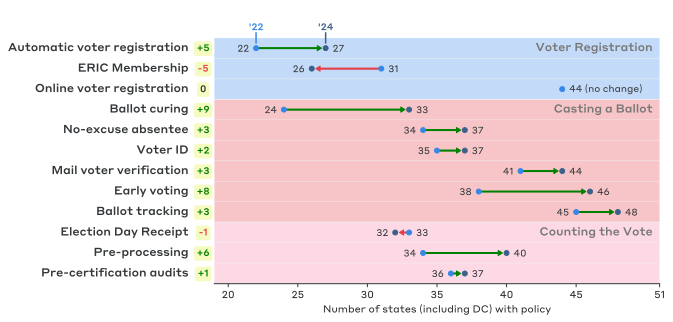

In [5]:
sns.set_style('ticks')

%config InlineBackend.figure_format = 'svg'
# plt.rcParams['figure.dpi'] = 200

fe = font_manager.FontEntry(
    fname= 'fonts/StyreneA-Black.otf',#'/Users/will/Library/Fonts/StyreneA-Black.otf',
    name='StyreneABlack')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

fe = font_manager.FontEntry(
    fname= 'fonts/StyreneA-Medium.otf',#'/Users/will/Library/Fonts/StyreneA-Medium.otf',
    name='StyreneAMedium')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

fe = font_manager.FontEntry(
    fname='fonts/StyreneA-Regular.otf',#'/Users/will/Library/Fonts/StyreneA-Regular.otf',
    name='StyreneARegular')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

matplotlib.rcParams['font.family'] = 'StyreneARegular' # = 'your custom ttf font name'

delta = 0.2

# bpc colors
bpc_blue = '#3C608A'
bpc_lightgray = '#d3d8d6'
bpc_darkgray = '#333638'
bpc_red = '#e43e47'
bpc_lightblue = '#3687e7'
bpc_lightyellow = '#f6fbc2'
bpc_lightpurple = '#ddafec'
bpc_pink='#f87fab'
bpc_orange='#eec044'

color2 = bpc_blue
color1 = bpc_lightblue


x_label_offset = 0.5
y_label_offset = 0.2 # for "'22"/"'24" labels

x_arrow_offset = 0.3
xlim = [19, denom]

ms = 5 # markersize

label_fontsize = 9.5

# for i, category in enumerate([gov, ssl]):
fig, ax = plt.subplots(figsize=(8, 5))

plot_names = sheet24.row_values(63)[7:]

for j in range(n):
    start = int(results22[j])
    end = int(results24[j])

    sign = 1

    ax.axhline(y=delta*(j + 0.5), color='#eee', linewidth=0.5, zorder=0)

    if end == start:
        
        ha1 = 'right'
        ha2 = 'left'

        end_label = f'{round(end)} (no change)'
        
        ax.plot(end, delta * j, 'o', color=color1, zorder=100, markersize=ms)
        ax.text(end + x_label_offset, delta * j, end_label, ha=ha2, va='center', color=bpc_darkgray, fontsize=label_fontsize)


    else:
        if end > start:
            arrow_color = 'green'
            ha1 = 'right'
            ha2 = 'left'

        elif end < start:
            arrow_color = bpc_red

            sign = -1
            ha1 = 'left'
            ha2 = 'right'


        ax.arrow(start, delta * j, end - start - sign * x_arrow_offset, 0, 
                    head_width=0.05, head_length=0.3, fc=arrow_color, ec=arrow_color,
                    width=.01,
                    overhang=0, length_includes_head=True, zorder=100)
                # Add starting dot
        ax.plot(start, delta * j, 'o', color=color1, zorder=100, markersize=ms)

        ax.plot(end, delta * j, 'o', color=color2, zorder=100, markersize=ms, clip_on=False)

        # percent_marker = '%' if j == 0 else ''
        # start_label = f'{round(start)}{percent_marker}'
        # end_label = f'{round(end)}{percent_marker}'
        start_label = f'{round(start)}'
        end_label = f'{round(end)}'
        ax.text(start - sign * x_label_offset, delta * j, start_label, ha=ha1, va='center_baseline', color=bpc_darkgray, fontsize=label_fontsize)
        ax.text(end + sign * x_label_offset, delta * j, end_label, ha=ha2, va='center_baseline', color=bpc_darkgray, fontsize=label_fontsize)


    if j == 0:
        ax.text(start, -y_label_offset, "'22", ha='center', va='center', color=color1, fontsize=label_fontsize, fontname='StyreneAMedium')
        ax.text(end, -y_label_offset, "'24", ha='center', va='center', color=color2, fontsize=label_fontsize, fontname='StyreneAMedium')
        
        ax.plot([start, start], [-y_label_offset * .25, -y_label_offset*.75], color=color1, zorder=0)
        ax.plot([end, end], [-y_label_offset * .25, -y_label_offset*.75], color=color2, zorder=0)
    
    # Add the change column
    change = end - start
    change_color = 'green' if change > 0 else bpc_red if change < 0 else bpc_darkgray
    change_text = f"+{change}" if change > 0 else f"{change}"
    ax.text(xlim[0]-0.8, delta * j-0.005, change_text, ha='center', va='center_baseline', fontname='StyreneAMedium', color=change_color, fontsize=label_fontsize,
            bbox=dict(facecolor=bpc_lightyellow, edgecolor='none', boxstyle='round,pad=0.3'))



# # Setting the x-axis label
ax.set_xlabel('Number of states (including DC) with policy')
xticks = [x for x in range(xlim[0], xlim[1]) if (x != 50) and (x % 5 == 0)] + [51]
ax.set_xticks(xticks)
ax.set_xlim(xlim)

sns.despine(left=True)

ax.tick_params(axis='y', length=0)


ax.spines['bottom'].set_color(bpc_darkgray)
ax.spines['bottom'].set_linewidth(1)
ax.tick_params(axis='x', color=bpc_darkgray, width=1)

# # Remove grid lines
ax.grid(False)

# # Remove the background
ax.set_facecolor('white')

# # Setting the y-axis labels
ax.set_yticks(np.arange(n) * delta)
ha='right' # switch between left and right
ax.set_yticklabels(plot_names, fontname='StyreneAMedium', color=bpc_darkgray, fontsize=11.5,
                   ha=ha, va='center')
ax.set_ylim([delta*(n-0.5), -delta*2])
ax.grid(False)

for label in ax.get_yticklabels():
    label.set_x(label.get_position()[0] - 0.05)


# add regions
shades = [bpc_lightblue, bpc_red, bpc_pink]
region_titles = ['Voter Registration', 'Casting a Ballot', 'Counting the Vote']

start = 0
for i, num in enumerate(number_by_cat):
    rect = plt.Rectangle((xlim[0], delta * (start - 0.5)), xlim[1] - xlim[0], delta * num, facecolor=shades[i], edgecolor=None, zorder=-1, alpha=0.3)
    ax.add_patch(rect)
    ax.text(xlim[1] - 0.5, delta * (start + num - number_by_cat[i]), region_titles[i], ha='right', va='center', fontname='StyreneAMedium', color='#777', fontsize=11.5)

    start += num


# # Display the plot
plt.show()

# fig.savefig(f'plot_{category}.png', dpi=300, bbox_inches='tight', transparent=False)
# fig.savefig(f'plot_{category}.png', dpi=300, bbox_inches=Bbox([[-.75, -.1], [7.55, 2]]), transparent=False)

fig.savefig(f'all_standards.png', dpi=300, bbox_inches='tight', transparent=False)

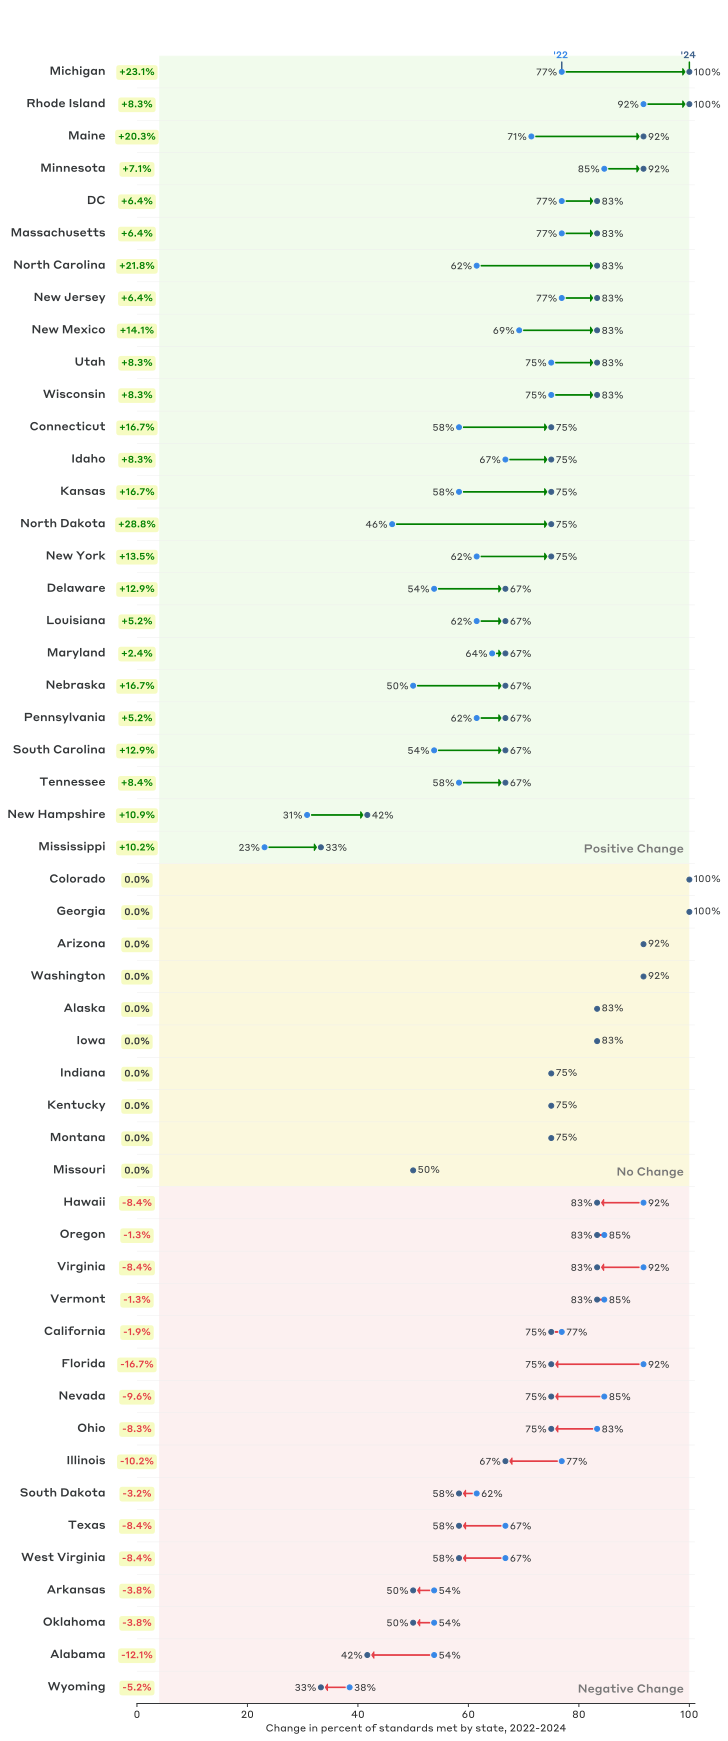

In [8]:
## 2020 - 2024 CHANGE BY STATE

df = change_state.copy()

df['State'] = df['State'].apply(lambda x: 'DC' if x=='DC' else us.states.lookup(x))

# try:
# Remove '%' sign and convert columns to float
df['2022'] = df['2022'].str.rstrip('%').astype(float)
df['2024'] = df['2024'].str.rstrip('%').astype(float)
# except:
#     pass

# Calculate percentage change
df['Change'] = df['2024'] - df['2022']

# Define conditions and corresponding labels
conditions = [
    df['Change'] > 0,
    df['Change'] == 0,
    df['Change'] < 0
]

# Ensure that all choices are strings
choices = ['Positive Change', 'No Change', 'Negative Change']

# Categorize the changes
df['Category'] = np.select(conditions, choices, default='No Change')

# Set the order of the categories manually
category_order = {'Positive Change': 0, 'No Change': 1, 'Negative Change': 2}
df['CategoryOrder'] = df['Category'].map(category_order)

# Sort the DataFrame first by CategoryOrder and then by 2024 compliance level
df = df.sort_values(by=['CategoryOrder', '2024'], ascending=[True, False])

# Drop the helper column after sorting
df = df.drop(columns=['CategoryOrder'])
df.reset_index(drop=True, inplace=True)

# Setting up font styles (assuming fonts are correctly located)
fe = font_manager.FontEntry(
    fname='fonts/StyreneA-Black.otf',
    name='StyreneABlack')
font_manager.fontManager.ttflist.insert(0, fe)

fe = font_manager.FontEntry(
    fname='fonts/StyreneA-Medium.otf',
    name='StyreneAMedium')
font_manager.fontManager.ttflist.insert(0, fe)

fe = font_manager.FontEntry(
    fname='fonts/StyreneA-Regular.otf',
    name='StyreneARegular')
font_manager.fontManager.ttflist.insert(0, fe)

matplotlib.rcParams['font.family'] = 'StyreneARegular'

# Visualization settings
delta = 0.5  # Increased spacing
bpc_blue = '#3C608A'
bpc_red = '#e43e47'
bpc_darkgray = '#333638'

# bpc colors
bpc_blue = '#3C608A'
bpc_lightblue = '#3687e7'

color2 = bpc_blue
color1 = bpc_lightblue

shade_colors = {'Positive Change': '#d0f0c0', 'No Change': '#f0e68c', 'Negative Change': '#f4cccc'}

fig, ax = plt.subplots(figsize=(10, len(df)*0.6))

region_titles = ['Positive Change', 'No Change', 'Negative Change']


# Set the x-axis limits to use in placing the text
xlim = [4, 100]  # Example x-axis limits; adjust as needed

# Add shading for each category
for i, category in enumerate(df['Category'].unique()):
    group = df[df['Category'] == category]
    start_idx = group.index[0]
    end_idx = group.index[-1]
    
    # Draw the shading rectangle
    rect = plt.Rectangle((xlim[0], delta * (start_idx - 0.5)), 96, delta * (len(group)), 
                        facecolor=shade_colors[category], zorder=-1, alpha=0.3)
    ax.add_patch(rect)
    
    # Position the title at the bottom right of the shading rectangle
    ax.text(xlim[1] - 1, delta * (start_idx + len(group) - 1.1),  # Adjusted y-coordinate for bottom alignment
            region_titles[i], ha='right', va='top', fontname='StyreneAMedium', color='#777', fontsize=11.5)


for j, row in df.iterrows():
    start = row['2022']
    end = row['2024']
    state = row['State']

    sign = 1

    ax.axhline(y=delta*(j + 0.5), color='#eee', linewidth=0.5, zorder=0)

    if end == start:
        ha1 = 'right'
        ha2 = 'left'
        end_label = f'{round(end)}%' # removed (no change)

        ax.plot(end, delta * j, 'o', color=bpc_blue, zorder=100, markersize=5)
        ax.text(end + .8, delta * j, end_label, ha=ha2, va='center', color=bpc_darkgray, fontsize=9.5)

    else:
        if end > start:
            arrow_color = 'green'
            ha1 = 'right'
            ha2 = 'left'
        else:
            arrow_color = bpc_red
            sign = -1
            ha1 = 'left'
            ha2 = 'right'

        # Define a small value to create the gap between the arrow and the dots
        gap = 0.8

        # Calculate the magnitude of the change
        magnitude = abs(end - start)

        # Adjust the arrow and decide whether to include an arrowhead based on the magnitude
        if magnitude < 2:
            # Draw a line without an arrowhead
            ax.plot([start + sign * gap, end - sign * gap], [delta * j, delta * j], 
                    color=arrow_color, linewidth=2, zorder=100)
        else:
            # Draw an arrow with a head
            if end > start:
                ax.arrow(start + gap, delta * j, end - start - 2 * gap, 0, 
                        head_width=0.1, head_length=0.4, fc=arrow_color, ec=arrow_color,
                        width=.01, overhang=0, length_includes_head=True, zorder=100)
            elif end < start:
                ax.arrow(start - gap, delta * j, end - start + 2 * gap, 0, 
                        head_width=0.1, head_length=0.4, fc=arrow_color, ec=arrow_color,
                        width=.01, overhang=0, length_includes_head=True, zorder=100)
                
        ax.plot(start, delta * j, 'o', color=color1, zorder=100, markersize=5)
        ax.plot(end, delta * j, 'o', color=color2, zorder=100, markersize=5, clip_on=False)

        start_label = f'{round(start)}%'
        end_label = f'{round(end)}%'
        ax.text(start - sign * .8, delta * j, start_label, ha=ha1, va='center_baseline', color=bpc_darkgray, fontsize=9.5)
        ax.text(end + sign * .8, delta * j, end_label, ha=ha2, va='center_baseline', color=bpc_darkgray, fontsize=9.5)

    if j == 0:
        ax.text(start, -0.25, "'22 ", ha='center', va='center', color=color1, fontsize=9.5, fontname='StyreneAMedium')
        ax.text(end, -0.25, "'24 ", ha='center', va='center', color=color2, fontsize=9.5, fontname='StyreneAMedium')
        ax.plot([start, start], [-0.05 * 0.25, -0.2 * .75], color=bpc_blue, zorder=0)
        ax.plot([end, end], [-0.05 * 0.25, -0.2 * .75], color=arrow_color, zorder=0)

    # Add the change column
    change = round(row['Change'], 1)
    change_color = 'green' if change > 0 else bpc_red if change < 0 else bpc_darkgray
    change_text = f"+{change}%" if change > 0 else f"{change}%"
    ax.text(0, delta * j-0.005, change_text, ha='center', va='center_baseline', fontname='StyreneAMedium', color=change_color, fontsize=9.5,
            bbox=dict(facecolor='#f6fbc2', edgecolor='none', boxstyle='round,pad=0.3'))

# Set axis limits and labels
ax.set_xlabel('Change in percent of standards met by state, 2022-2024')
ax.set_xlim([0, 101])

sns.despine(left=True)
ax.tick_params(axis='y', length=0)

ax.spines['bottom'].set_color(bpc_darkgray)
ax.spines['bottom'].set_linewidth(1)
ax.tick_params(axis='x', color=bpc_darkgray, width=1)

# Remove grid lines and background
ax.grid(False)
ax.set_facecolor('white')

# Set y-axis labels
ax.set_yticks(np.arange(len(df)) * delta)
ax.set_yticklabels(df['State'], fontname='StyreneAMedium', color=bpc_darkgray, fontsize=11.5, ha='right', va='center')
ax.set_ylim([delta*(len(df)-0.5), -delta*2])
ax.grid(False)

for label in ax.get_yticklabels():
    label.set_x(label.get_position()[0] - 0.05)

plt.show()

fig.savefig(f'percent_change_by_state.png', dpi=300, bbox_inches='tight', transparent=False)

In [9]:
## ANALYZE PVI

# replace state names with abbreviations
pvi['State'] = pvi['State'].apply(lambda x: 'DC' if x=='District of Columbia' else us.states.lookup(x).abbr)
# convert PVI to numeric
pvi['2020 PVI'] = (pvi['2020 PVI'].str.replace('D+', '-').str.replace('R+', '')).astype(int)

# get overall adoption rates from the sheet
df = pd.DataFrame(sheet24.get_values()[1:])
df.columns = df.iloc[0]
df = df.drop(0)
df = df[['State', 'Percentage of Requirements Met by State']]
df = df.loc[:51]
df.rename(columns={'Percentage of Requirements Met by State': 'Compliance'}, inplace=True)
df['Compliance'] = df['Compliance'].str.replace('%', '').astype(float)/100

#merge adoption rates with PVI
df = pd.merge(pvi[['State', '2020 PVI']], df, on='State', how='left')
df.head()

,State,2020 PVI,Compliance
0,AL,15,0.417
1,AK,8,0.833
2,AZ,2,0.917
3,AR,16,0.500
4,CA,-13,0.750


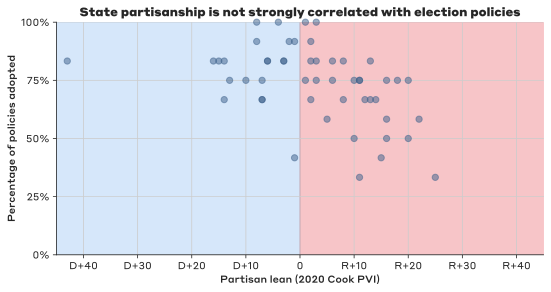

In [10]:

# plt.figure(figsize=(2,5))

plt.scatter(df['2020 PVI'], df['Compliance'], clip_on=False, color=bpc_blue, s=40, alpha=0.5)
# sns.lmplot(df, x='2020 PVI', y='Compliance') # for regression line
ax = plt.gca()
# plt.xscale('linear')
plt.title('State partisanship is not strongly correlated with election policies', fontname='StyreneABlack')
plt.ylabel('Percentage of policies adopted', fontname='StyreneAMedium')
plt.xlabel('Partisan lean (2020 Cook PVI)', fontname='StyreneAMedium')
plt.ylim([0, 1])

plt.grid(True)

ax.set_yticks(np.linspace(0, 1, 5))  # Setting the ticks at 0, 0.25, 0.5, 0.75, 1
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

plt.tight_layout()

# OPTION 1: INCLUDE DC
extent = 45

# OPTION 2: EXCLUDE DC
# extent = 27

def get_xticks(extent):
    extent = (extent // 10) * 10
    start = -extent
    end = extent + 10
    return range(start, end, 10)

xticks = get_xticks(extent)
ax.set_xticks(xticks)
ax.set_xticklabels([f'D+{abs(x)}' if x < 0 else f'R+{x}' if x > 0 else 0 for x in xticks])

xlim = [-extent, extent]
plt.xlim(xlim)

rect = plt.Rectangle((xlim[0], 0), extent, 1, color=bpc_lightblue, zorder=-1, alpha=0.2)
ax.add_patch(rect)
rect = plt.Rectangle((0, 0), extent, 1, color=bpc_red, zorder=-1, alpha=0.3)
ax.add_patch(rect)


plt.yticks(size=10, fontname='StyreneARegular')
plt.xticks(size=10, fontname='StyreneARegular')

plt.gcf().set_size_inches(8, 4)
sns.despine()
plt.savefig('compliance_by_pvi.svg')
plt.savefig('compliance_by_pvi.png', dpi=300)
